In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from torch import nn

from sklearn.datasets.samples_generator import make_blobs

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


# Generate sample datasets with two distinct classes 


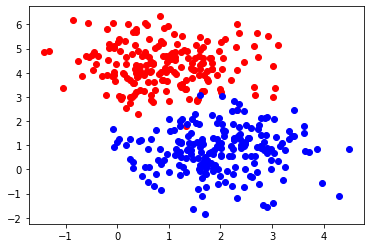

In [ ]:
X, Y = make_blobs(n_samples=400, centers=2, random_state=0, cluster_std=0.9)  # X - features, Y - labels, center가 2개 되도록, std 작아지면 구분쉬움
plt.scatter(x=X[Y==0, 0], y=X[Y==0, 1], c='red') #class label 0
plt.scatter(x=X[Y==1, 0], y=X[Y==1, 1], c='blue') #class label 1

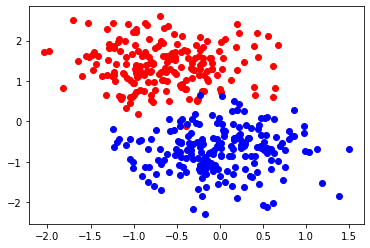

In [ ]:
X = (X - X.mean())/X.std()  # Feature scaling, 오밀조밀 모여있기 위해
Y[Y == 0] = -1  # Replace zeros with -1
plt.scatter(x=X[Y==-1, 0], y=X[Y==-1, 1], c='red')
plt.scatter(x=X[Y==1, 0], y=X[Y==1, 1], c='blue')

In [ ]:
class LSVM(nn.Module):
    """
    This SVM is a subclass of the PyTorch nn module that implements the Linear  function. 
    The  size  of  each input sample is 2 and output sample  is 1.
    """
    def __init__(self, D_in, D_out):
        super().__init__()
        self.linear = nn.Linear(D_in, D_out)
    def forward(self, x):
        x = self.linear(x)
        return x

In [ ]:
torch.manual_seed(1)
model = LSVM(2, 1)
model

LSVM(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
#optimizer = torch.optim.SGD(model.parameters(), lr = 0.001, momentum=0.9)

In [ ]:
epochs = 30
batch_size = 1  # Batch size

running_loss_history = []
# running_corrects_history = []

X = torch.FloatTensor(X)  # Convert X and Y to FloatTensors
Y = torch.FloatTensor(Y)
N = len(Y)  # Number of samples, 500

for eno in range(epochs):
  
  running_loss = 0.0
  running_corrects = 0.0

  perm = torch.randperm(N)  # Generate a set of random numbers of length: sample size
  
  for i in range(0, N, batch_size):
    x = X[perm[i:i + batch_size]]  # Pick random samples by iterating over random permutation
    y = Y[perm[i:i + batch_size]]  # Pick the correlating class
    
    optimizer.zero_grad()  # Manually zero the gradient buffers of the optimizer
    output = model(x)  # Compute the output by doing a forward pass

    loss = torch.mean(torch.clamp(1 - output * y, min=0))#clamp-0이하면 0이라고 하세요, batch 여러개라면 평균내야 되어서 mean
    # 위에식 hinge loss / or SVM loss !!!!!!
    loss.backward()  # Backpropagation
    optimizer.step()  # Optimize and adjust weights

    running_loss += loss.item() # loss per batch 
      
  epoch_loss = running_loss/N 
  # epoch_acc = running_corrects.float()/ len(train_loader)
  running_loss_history.append(epoch_loss)
  # running_corrects_history.append(epoch_acc)
  print('--------epoch :', (eno+1), '-----------------------')
  print('Epoch {}, Training loss: {:.4f} '.format(eno, epoch_loss))

--------epoch : 1 -----------------------
Epoch 0, Training loss: 0.4600 
--------epoch : 2 -----------------------
Epoch 1, Training loss: 0.3064 
--------epoch : 3 -----------------------
Epoch 2, Training loss: 0.2133 
--------epoch : 4 -----------------------
Epoch 3, Training loss: 0.1621 
--------epoch : 5 -----------------------
Epoch 4, Training loss: 0.1350 
--------epoch : 6 -----------------------
Epoch 5, Training loss: 0.1185 
--------epoch : 7 -----------------------
Epoch 6, Training loss: 0.1073 
--------epoch : 8 -----------------------
Epoch 7, Training loss: 0.0990 
--------epoch : 9 -----------------------
Epoch 8, Training loss: 0.0929 
--------epoch : 10 -----------------------
Epoch 9, Training loss: 0.0874 
--------epoch : 11 -----------------------
Epoch 10, Training loss: 0.0821 
--------epoch : 12 -----------------------
Epoch 11, Training loss: 0.0776 
--------epoch : 13 -----------------------
Epoch 12, Training loss: 0.0738 
--------epoch : 14 ------------

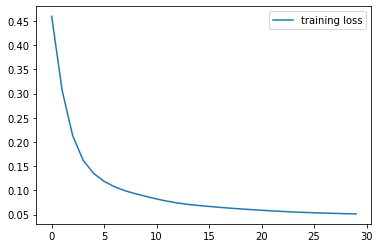

In [ ]:
plt.plot(running_loss_history, label='training loss')
# plt.plot(val_running_loss_history, label='validation loss')
plt.legend()

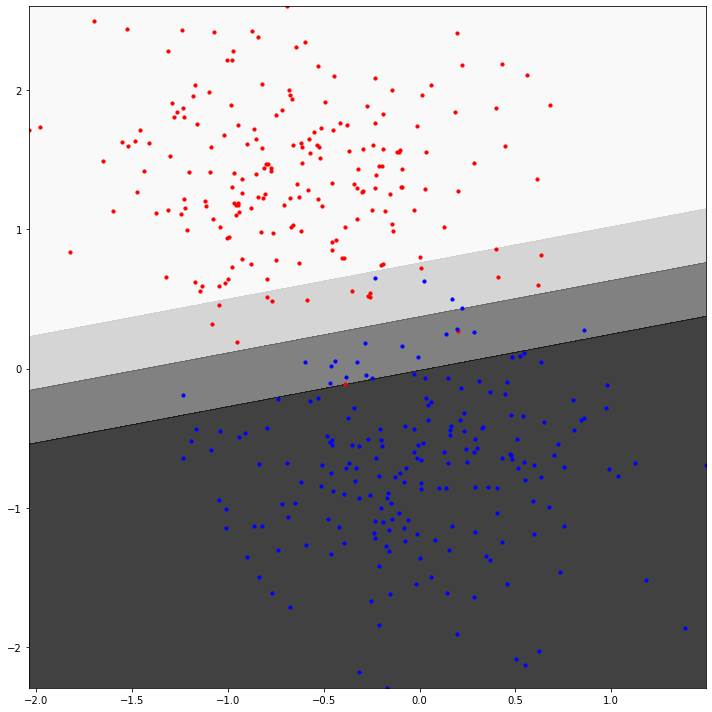

In [ ]:
def visualize(X, Y, model):
    delta = 0.001
    x = np.arange(X[:, 0].min(), X[:, 0].max(), delta)
    y = np.arange(X[:, 1].min(), X[:, 1].max(), delta)
    x, y = np.meshgrid(x, y)          # x, y for plotting, y is not a label.
    xy = list(map(np.ravel, [x, y]))   

    xy = torch.Tensor(xy)
    xy = torch.transpose(xy, 0, 1)

    z = model(xy).detach().numpy().reshape(x.shape)
    z[np.where(z > 1.0)] = 4 #1,2,3,4 색깔코드임
    z[np.where((z > 0.0) & (z <= 1.0))] = 3
    z[np.where((z > -1.0) & (z <= 0.0))] = 2
    z[np.where(z <= -1.0)] = 1

    plt.figure(figsize=(10, 10))
    plt.xlim([X[:, 0].min() + delta, X[:, 0].max() - delta])
    plt.ylim([X[:, 1].min() + delta, X[:, 1].max() - delta])
    plt.contourf(x, y, z, alpha=0.8, cmap="Greys")
    plt.scatter(x=X[Y==-1, 0], y=X[Y==-1, 1], c="red", s=10)
    plt.scatter(x=X[Y==+1, 0], y=X[Y==+1, 1], c="blue", s=10)
    plt.tight_layout()
    plt.show()


visualize(X, Y, model)